In [1]:
#using NLTK and the Brown Corpus within it, I want to carry out a frequency analysis of personal pronouns between the
#different genres in the corpus. My hypothesis is that "he" will be used more frequently than "she" across all genres,
#but that the difference will be smaller in genres such as romance, fiction and humor than in genres such as religion,
#news or science fiction. I expect that "they" will be more frequent in the more scientifically oriented genres, while "you"
#will be less frequent in them.

In [2]:
import nltk
from nltk.corpus import brown

In [3]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news', 'editorial', 'reviews', 'lore', 'belles_lettres', 'government', 'learned', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor', 'fiction', 'mystery', 'adventure']
words = ["I", "you", "he", "she", "they"]
cfd.tabulate(conditions=genres, samples=words)

                   I  you   he  she they 
           news  179   55  451   42  205 
      editorial  201   83  268   41  148 
        reviews   49   29  161   42   74 
           lore  265  209  541  232  303 
 belles_lettres  845  188 1174  178  488 
     government   97   74  120    0   92 
        learned  182   39  328   54  338 
       religion  155  100  137   10  115 
        hobbies  154  383  155   21  177 
science_fiction   98   81  139   36   53 
        romance  951  456  702  496  168 
          humor  239  131  146   58   70 
        fiction  511  236  813  280  230 
        mystery  583  340  670  219  106 
      adventure  652  362  761  240  206 


In [5]:
from numpy import arange
from matplotlib import pyplot

In [18]:
def bar_chart(categories, words, counts):
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper right')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of personal pronouns by Genre')
    pyplot.show()

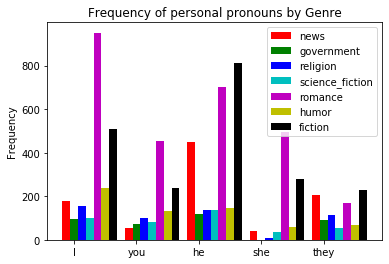

In [19]:
genres = ['news', 'government', 'religion','science_fiction', 'romance', 'humor', 'fiction']
pronouns = ["I", "you", "he", "she", "they"]
cfdist = nltk.ConditionalFreqDist(
(genre, word)
    for genre in genres
    for word in nltk.corpus.brown.words(categories=genre)
    if word in pronouns)
counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

In [ ]:
#I had to shorten the list of genres to make the graph more readable; as can be seen from the table above as well as the
#graph, my hypothesis that "he" will be more frequent than "she" across all genres was proven to be correct. Of course, one
#should not forget that the texts in the Brown Corpus are from the 1960s. This may also help explain the complete absence of
#the word "she" in government texts. There is also a very visible trend for texts of the romance genre to rely heavily on
#personal pronouns, especially in the singular; the difference between "he" and "she" is also smaller here than in any of the
#other genres examined.
#This has been a rather minimal analysis; I hope it is enough for what you were asking for for this assignment. If not, I can
#provide further research within a week. In the context of these results, further areas that could be of interest might
#include looking at how often the words "he" or "she" are used in conjunction with certain verbs or adjectives in order
#to try and find tendencies for what qualities may or may not be ascribed more frequently to people of a certain gender.